In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten ,Dropout

# Loading Dataset


In [127]:
# loading the data 

test_data = pd.read_csv('sign_mnist_test.csv')
train_data = pd.read_csv('sign_mnist_train.csv')

# separating the data and labels

X_train = train_data.drop('label', axis=1).values
Y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
Y_test = test_data['label'].values

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

X_train = X_train/255
X_test = X_test/255

# Model Creation

In [120]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25,activation='softmax'))

C:\Users\dangw\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [121]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [122]:
model.fit(X_train,Y_train , epochs=10, batch_size=64)

Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.1842 - loss: 2.6929
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.7060 - loss: 0.8447
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8529 - loss: 0.4269
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9156 - loss: 0.2465
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9482 - loss: 0.1561
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9702 - loss: 0.0975
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9756 - loss: 0.0743
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9815 - loss: 0.0582
Epoch 9/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9858 - loss: 0.0450
Epoch 10/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9881 - loss: 0.0378


In [123]:
model.evaluate(X_test,Y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8978 - loss: 0.3968


[0.4046052098274231, 0.8998884558677673]

In [77]:
model.save('SignDetection_model.h5')

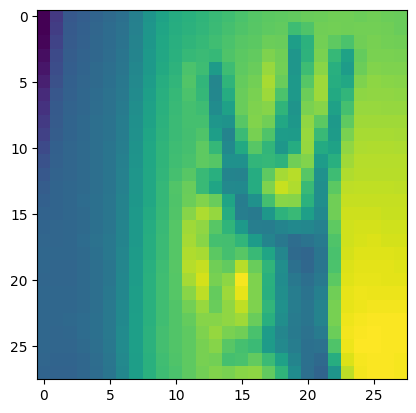

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
W


In [126]:
idx = random.randint(0,25)

plt.imshow(X_test[idx])
plt.show()



pred = model.predict(X_test[idx,:].reshape(-1,28,28,1))

predicted_class = np.argmax(pred)

print(chr(65+predicted_class))